In [2]:
from google.colab import files
uploaded=files.upload()

Saving train.csv to train.csv


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

In [5]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape


(1460, 81)

In [10]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [11]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Numerical Columns:", len(num_cols))
print("Categorical Columns:", len(cat_cols))

Numerical Columns: 37
Categorical Columns: 43


In [12]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [16]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [17]:
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_cols),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

In [18]:
from sklearn.linear_model import Ridge, Lasso

ridge_model = Pipeline([
    ('preprocess', preprocessor),
    ('ridge', Ridge(alpha=1.0))
])

lasso_model = Pipeline([
    ('preprocess', preprocessor),
    ('lasso', Lasso(alpha=0.001, max_iter=5000))
])


In [19]:
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94357037237.56445, tolerance: 696659484.3571944
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=0.001, max_iter=5000))])

In [20]:
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [22]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

In [23]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_r2 = r2_score(y_test, lasso_pred)

print("📌 Ridge Regression")
print("RMSE:", ridge_rmse)
print("R² Score:", ridge_r2)

print("\n📌 Lasso Regression")
print("RMSE:", lasso_rmse)
print("R² Score:", lasso_r2)

📌 Ridge Regression
RMSE: 29844.251463164233
R² Score: 0.8838798609944372

📌 Lasso Regression
RMSE: 28320.806471440243
R² Score: 0.8954323378787683


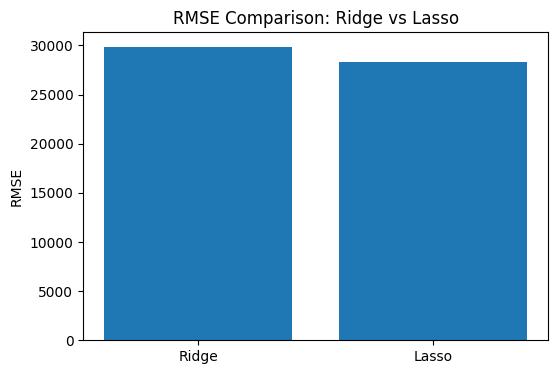

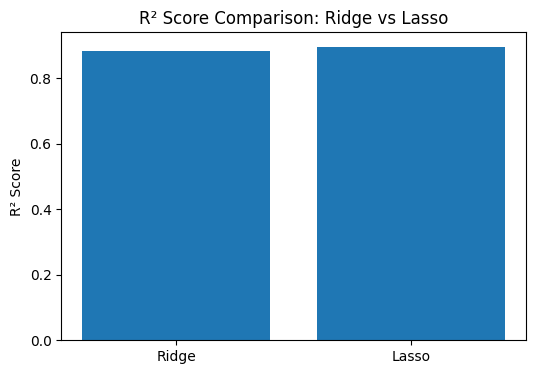

In [24]:
import matplotlib.pyplot as plt
import numpy as np

models = ["Ridge", "Lasso"]
rmse_values = [ridge_rmse, lasso_rmse]
r2_values = [ridge_r2, lasso_r2]

# --- RMSE COMPARISON ---
plt.figure(figsize=(6,4))
plt.bar(models, rmse_values)
plt.title("RMSE Comparison: Ridge vs Lasso")
plt.ylabel("RMSE")
plt.show()

# --- R2 SCORE COMPARISON ---
plt.figure(figsize=(6,4))
plt.bar(models, r2_values)
plt.title("R² Score Comparison: Ridge vs Lasso")
plt.ylabel("R² Score")
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289641193332.2522, tolerance: 920791133.4609975
  model = cd_fast.sparse_enet_coordinate_descent(


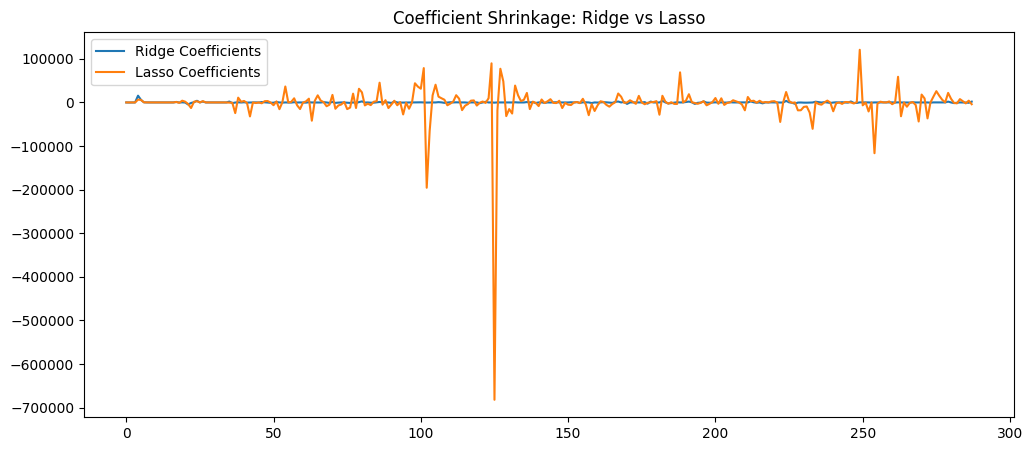

In [25]:
from sklearn.linear_model import Ridge, Lasso

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

simple_preprocess = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), numeric_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

X_encoded = simple_preprocess.fit_transform(X)
feature_names = simple_preprocess.get_feature_names_out()

ridge = Ridge(alpha=1.0).fit(X_encoded, y)
lasso = Lasso(alpha=0.001, max_iter=5000).fit(X_encoded, y)

plt.figure(figsize=(12,5))
plt.plot(ridge.coef_, label="Ridge Coefficients")
plt.plot(lasso.coef_, label="Lasso Coefficients")
plt.title("Coefficient Shrinkage: Ridge vs Lasso")
plt.legend()
plt.show()
